<a href="https://colab.research.google.com/github/shrizaan/Image-Classification-with-Convolutional-Neural-Network-/blob/main/HewanFIX_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Directory Data
import zipfile, os
local_zip = '/content/drive/MyDrive/Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
#Melihat Jumlah Gambar pada Tiap Folder atau Kelas
print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar Anjing      :', len(os.listdir('/content/train/anjing')))
print('Jumlah gambar Kucing      :', len(os.listdir('/content/train/kucing')))
print('Jumlah gambar Kuda        :', len(os.listdir('/content/train/kuda')))

Jumlah Data Train Tiap Kelas
Jumlah gambar Anjing      : 251
Jumlah gambar Kucing      : 251
Jumlah gambar Kuda        : 250


In [ ]:
#Membuat folder baru 
os.mkdir('/tmp/s/')
os.mkdir('/tmp/s/train/')
os.mkdir('/tmp/s/val/')
os.mkdir('/tmp/s/train/anjing/')
os.mkdir('/tmp/s/val/anjing/')
os.mkdir('/tmp/s/train/kucing/')
os.mkdir('/tmp/s/val/kucing/')
os.mkdir('/tmp/s/train/kuda/')
os.mkdir('/tmp/s/val/kuda/')

In [ ]:
#Pembagian Training dan Validasi
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.8


source_00 = '/content/train/anjing/'
train_00 = '/tmp/s/train/anjing/'
val_00 = '/tmp/s/val/anjing/'
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = '/content/train/kucing/'
train_01 = '/tmp/s/train/kucing/'
val_01 = '/tmp/s/val/kucing/'
train_val_split(source_01, train_01, val_01, train_ratio)

source_02 = '/content/train/kuda/'
train_02 = '/tmp/s/train/kuda/'
val_02 = '/tmp/s/val/kuda/'
train_val_split(source_02, train_02, val_02, train_ratio)

In [ ]:
print('Jumlah All anjing     :', len(os.listdir('/content/train/kucing/')))
print('Jumlah Train anjing   :', len(os.listdir('/tmp/s/train/kucing/')))
print('Jumlah Val anjing     :', len(os.listdir('/tmp/s/val/kucing/')))



Jumlah All anjing     : 251
Jumlah Train anjing   : 251
Jumlah Val anjing     : 145


In [ ]:
#Library
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255.,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./255.,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [ ]:
train_dir = '/tmp/s/train'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 3,
    class_mode = 'categorical'
)

val_dir = '/tmp/s/val'
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 3,
    class_mode = 'categorical'
)

Found 751 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
# callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#Fungsi aktivasi 
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dropout(0.3,seed=112),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dropout(0.5,seed=112),
          tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
#Arsitekture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [ ]:
#Mengcompile
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
#Membuat HistorY
history = model.fit(
            train_generator,
            steps_per_epoch = 20,
            epochs = 250,
            validation_data = val_generator,
            validation_steps = 5,
            verbose = 1,
            callbacks = [callbacks]
)

Epoch 1/250
20/20 [==============================] - 4s 189ms/step - loss: 1.1025 - accuracy: 0.3833 - val_loss: 1.0877 - val_accuracy: 0.4000
Epoch 2/250
20/20 [==============================] - 4s 175ms/step - loss: 1.1198 - accuracy: 0.4500 - val_loss: 0.9949 - val_accuracy: 0.4000
Epoch 3/250
20/20 [==============================] - 4s 175ms/step - loss: 1.1179 - accuracy: 0.3000 - val_loss: 1.0514 - val_accuracy: 0.7333
Epoch 4/250
20/20 [==============================] - 6s 312ms/step - loss: 1.1048 - accuracy: 0.4167 - val_loss: 1.1105 - val_accuracy: 0.2667
Epoch 5/250
20/20 [==============================] - 3s 174ms/step - loss: 1.1008 - accuracy: 0.3667 - val_loss: 1.0609 - val_accuracy: 0.4667
Epoch 6/250
20/20 [==============================] - 4s 174ms/step - loss: 1.1120 - accuracy: 0.4167 - val_loss: 1.0517 - val_accuracy: 0.6000
Epoch 7/250
20/20 [==============================] - 3s 174ms/step - loss: 1.0369 - accuracy: 0.4333 - val_loss: 1.0009 - val_accuracy: 0.4667

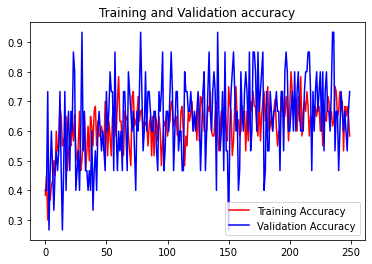

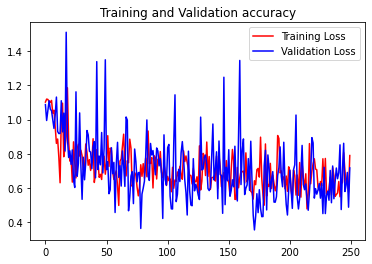

In [ ]:

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

Saving kucing (2).jpg to kucing (2).jpg
1/1 [==============================] - 0s 28ms/step
kucing (2).jpg
Ini adalah  kucing


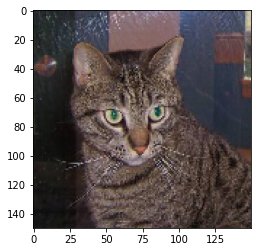

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  # img = image.load_img(path, target_size = (150, 150))
  img = tf.keras.utils.load_img(path, target_size= (150, 150, 3))
  imgplot = plt.imshow(img)
  # x = image.img_to_array(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir('/content/train/')
  
  for j in range(42):
    if classes[0][j] == 1. :
      print('Ini adalah ', class_list[j])
      break